In [1]:
import numpy as np
import pulp as plp
import random
import matplotlib.pyplot as plt
import time
import networkx as nx
from tqdm import tqdm
%matplotlib notebook

In [27]:
def FG(N,k):

    #G = nx.triangular_lattice_graph(N,N)
    G = nx.grid_2d_graph(N,N)
    #G = nx.path_graph(N)

    N = len(G.nodes())
    
    m=int(round(k*N))
    n=int(round((1-k)*N))

    a = np.ones(N)
    a[:m] = -1
    np.random.shuffle(a)
    
    node_colors=[]
    for i in a:
        if i==1:
            node_colors.append("Silver")
        else:
            node_colors.append("Black")

    attr = {}
    for (node,value),color in zip(G.nodes.data(),node_colors):
        attr[node]=color

    nx.set_node_attributes(G, attr, 'color')
    
    return G

In [28]:
def frustration_count(G):
    s = 0
    for n1,n2,val in G.edges.data():
        if G.nodes[n1]['color']==G.nodes[n2]['color']:
            s+=1
    return s

In [29]:
def color_of_frustration(G):
    
    positive=0
    negative=0
    for n1,n2,val in G.edges.data():
        if G.nodes[n1]['color']==G.nodes[n2]['color']:
            
            if G.nodes[n1]['color'] == G.nodes[n2]['color'] == "Black":
                negative +=1
            else:
                positive +=1
    return positive,negative

In [33]:
def Properties(G):
    positive,negative = color_of_frustration(G)
    
    print("N: ",len(G.nodes()))
    print("L: ",len(G.edges()))

    node_colors=nx.get_node_attributes(G,'color')
    #print("Black: ",len([i for i in node_colors.values() if i=="Black"]))
    #print("White: ",len([i for i in node_colors.values() if i=="Silver"])) 
    print("f: ",frustration_count(G))
    print("L-f: ",len(G.edges())-frustration_count(G))

    print("f+: ",positive)
    print("f-: ",negative)
    
    print("Delta: ",positive-negative)
    print("Abs(Delta): ",int(np.sqrt((positive-negative)**2)))

    print(frustration_count(G)/len(G.edges()))

In [59]:
def Rewire(N,k):

    G = FG(N,k)

    #Properties(G)
    a = frustration_count(G)
    
    #################################################################################################
    
    H = nx.algorithms.double_edge_swap(G.copy(), nswap=1)
    #print("#"*100)
          
    #################################################################################################    
    
    #Properties(H)
    b = frustration_count(H)
    
    if a == b:
        return 0
    if b > a:
        return 2
    if b < a:
        return -2

    print("end")

In [60]:
Rewire(5,0.5)

2

# Calculating Stationary Probability

In [150]:
def Calculate_Probabilites(size,prop):
    probabilites = []
    edges = []
    for i in range(10):
        avg=[]
        for k in tqdm(range(1000)):

            H = FG(size,prop)

            edges.append(len(H.copy().edges()))
            f = frustration_count(H.copy())
            avg.append(f)

        prob=[]
        for i in range(0,max(edges)):
            prob.append(np.count_nonzero(np.array(avg) == i))
        probabilites.append(prob)

    total = np.array(probabilites)
    final = []
    for i in range(0,len(total[0])):
        final.append((np.mean(total[:,i])/1000,np.std(total[:,i])/1000))

    return np.array(final)

In [125]:
Properties(FG(5,0.5))

N:  25
L:  40
f:  22
L-f:  18
f+:  12
f-:  10
Delta:  2
Abs(Delta):  2
0.55


In [102]:
probabilites=Calculate_Probabilites(5)

100%|██████████| 1000/1000 [00:00<00:00, 2299.67it/s]


In [115]:
probabilites=Calculate_Probabilites(5)
values = probabilites[:,0]
errors = probabilites[:,1]

<IPython.core.display.Javascript object>


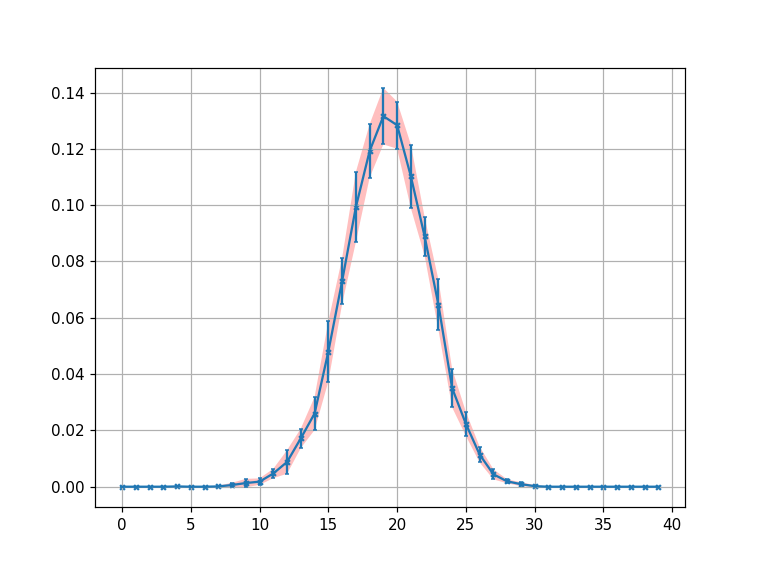

In [133]:
fig, ax = plt.subplots()#figsize=[8,8])
ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
ax.errorbar([i for i in range(len(values))],values,errors,capsize=1)
ax.scatter([i for i in range(len(values))],values,s=10,marker="x")
ax.grid()

In [134]:
probabilites=Calculate_Probabilites(10)
values = probabilites[:,0]
errors = probabilites[:,1]

100%|██████████| 1000/1000 [00:01<00:00, 588.37it/s]


<IPython.core.display.Javascript object>


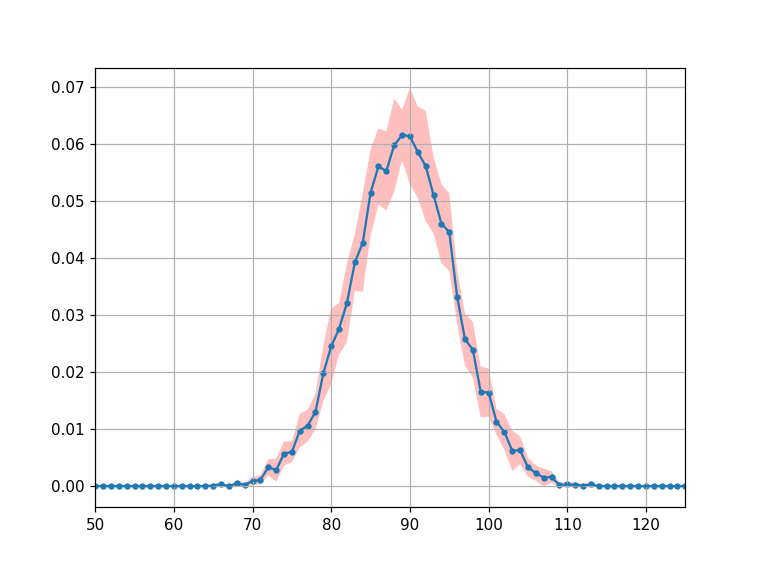

(50.0, 125.0)

In [138]:
fig, ax = plt.subplots()#figsize=[8,8])
ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
ax.errorbar([i for i in range(len(values))],values,capsize=1)
ax.scatter([i for i in range(len(values))],values,s=10)#,marker="x")
ax.grid()
ax.set_xlim(50,125)

In [139]:
Properties(FG(10,0.5))

N:  100
L:  180
f:  89
L-f:  91
f+:  44
f-:  45
Delta:  -1
Abs(Delta):  1
0.49444444444444446


In [141]:
probabilites=Calculate_Probabilites(50)
values = probabilites[:,0]
errors = probabilites[:,1]

100%|██████████| 1000/1000 [00:49<00:00, 20.35it/s]


<IPython.core.display.Javascript object>


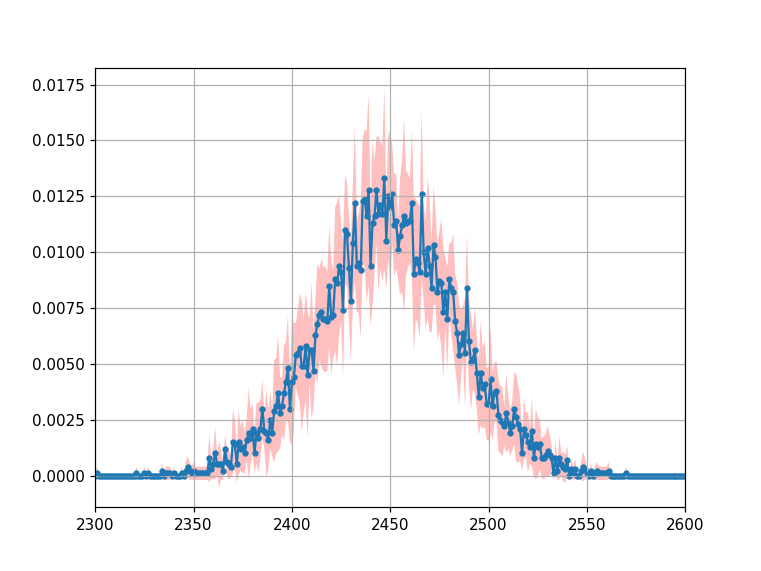

(2300.0, 2600.0)

In [146]:
fig, ax = plt.subplots()#figsize=[8,8])
ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
ax.errorbar([i for i in range(len(values))],values,capsize=1)
ax.scatter([i for i in range(len(values))],values,s=10)#,marker="x")
ax.grid()
ax.set_xlim(2300,2600)

In [148]:
np.save("prob.txt",probabilites)

In [157]:
np.save("avg.txt",avg)

In [149]:
fo
probs=Calculate_Probabilites(5,)
values = probs[:,0]
errors = probs[:,1]

100%|██████████| 1000/1000 [00:00<00:00, 2276.73it/s]


In [153]:
avg=[]
for i in np.linspace(0,1,10):
    probs=Calculate_Probabilites(5,i)
    avg.append(probs)

100%|██████████| 1000/1000 [00:00<00:00, 2229.51it/s]


<IPython.core.display.Javascript object>


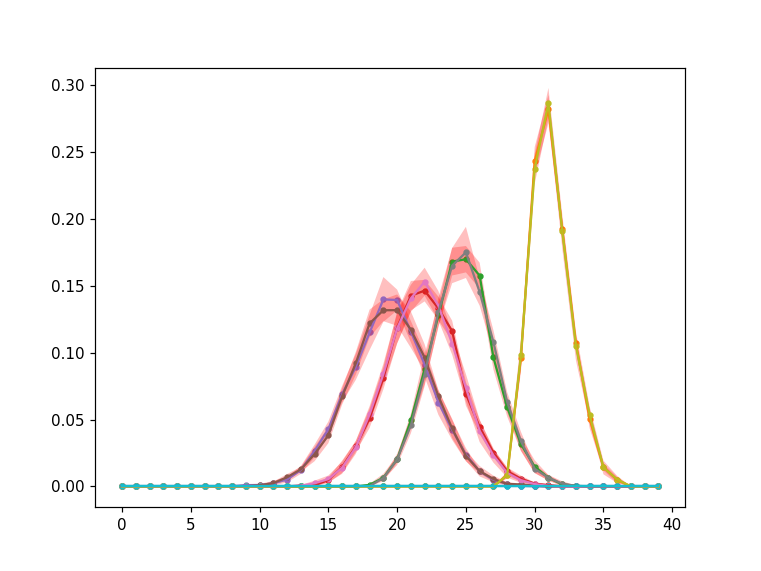

In [156]:
fig, ax = plt.subplots()#figsize=[8,8])
for j in range(len(avg)):
    values = avg[j][:,0]
    errors = avg[j][:,1]
    ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
    ax.errorbar([i for i in range(len(values))],values,capsize=1)
    ax.scatter([i for i in range(len(values))],values,s=10)#,marker="x")
    ax.grid()

<IPython.core.display.Javascript object>


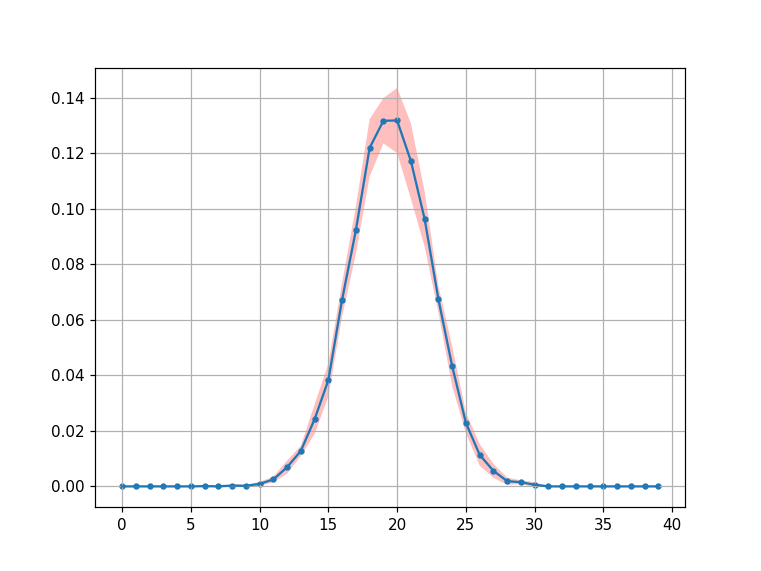

In [170]:
j=5
fig, ax = plt.subplots()
values = avg[j][:,0]
errors = avg[j][:,1]
ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
ax.errorbar([i for i in range(len(values))],values,capsize=1)
ax.scatter([i for i in range(len(values))],values,s=10)#,marker="x")
ax.grid()

# 3D Line Plot

<IPython.core.display.Javascript object>


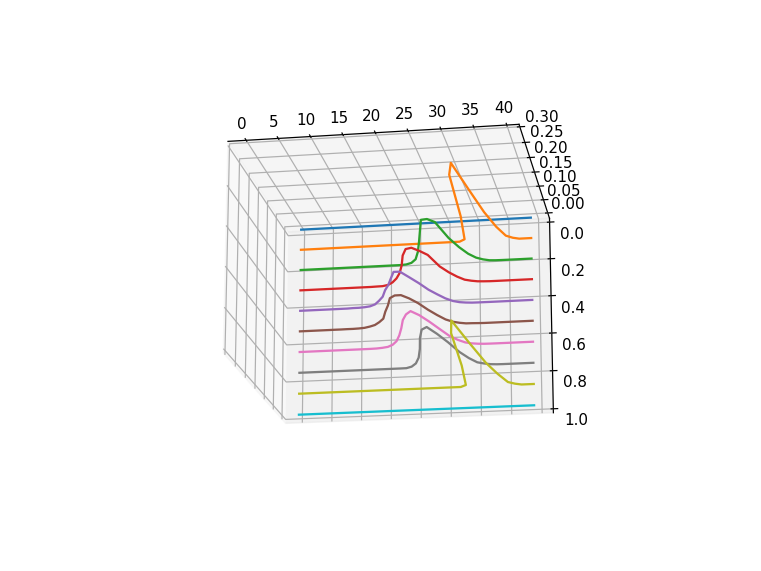

In [224]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for j in range(len(avg)):
    #ax.plot([i for i in range(len(avg[j][:,0]))],avg[j][:,0],j, label='parametric curve')
    ax.plot([i for i in range(len(avg[j][:,0]))],avg[j][:,0],np.linspace(0,1,10)[j], label='parametric curve')
ax.view_init(azim=-90, elev=120)

In [225]:
avg2=[]
for i in np.linspace(0,1):
    probs=Calculate_Probabilites(5,i)
    avg2.append(probs)

100%|██████████| 1000/1000 [00:00<00:00, 2212.04it/s]


100%|██████████| 1000/1000 [00:00<00:00, 2234.89it/s]


<IPython.core.display.Javascript object>


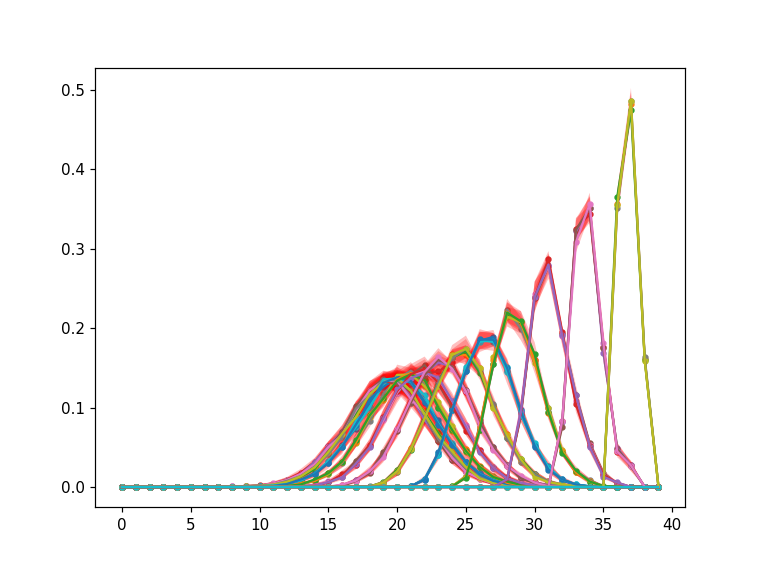

In [226]:
fig, ax = plt.subplots()#figsize=[8,8])
for j in range(len(avg2)):
    values = avg2[j][:,0]
    errors = avg2[j][:,1]
    ax.fill_between([i for i in range(len(values))], values - errors, values + errors,facecolor="red", alpha=0.25)#, edgecolor="black")
    ax.errorbar([i for i in range(len(values))],values,capsize=1)
    ax.scatter([i for i in range(len(values))],values,s=10)#,marker="x")
    ax.grid()

<IPython.core.display.Javascript object>


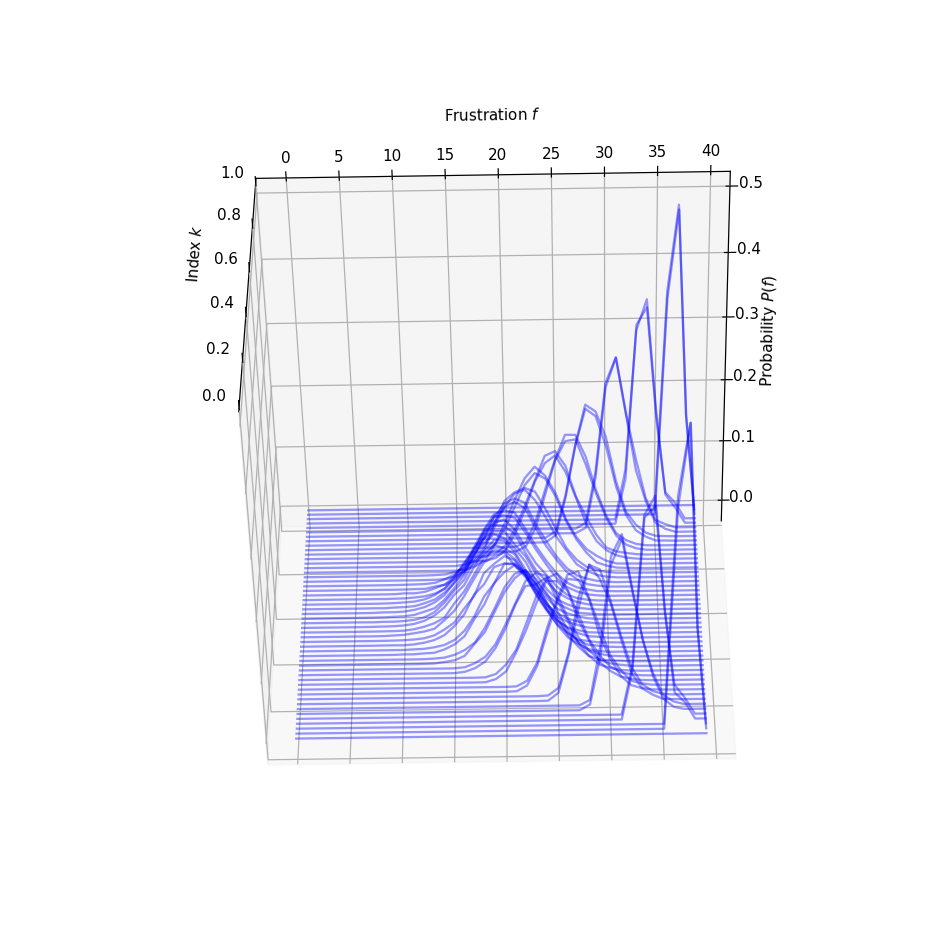

In [257]:
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')

for j in range(len(avg2)):
    #ax.plot([i for i in range(len(avg[j][:,0]))],avg[j][:,0],j, label='parametric curve')
    ax.plot(avg2[j][:,0],[i for i in range(len(avg2[j][:,0]))],np.linspace(0,1)[j], label='parametric curve',c="blue",alpha=0.4)
ax.view_init(azim=0, elev=-20)

ax.set_xlabel('Probability $P(f)$')
ax.set_ylabel('Frustration $f$')
ax.set_zlabel('Index $k$')
plt.show()

In [258]:
np.save("avg2.txt",avg2)